# Logistic regrssion and the ROC curve
Logistic regression is used in classification problems.

## Logistic regression for binary classification
- Logistic regression outputs probabilities
- If the probability 'p' is greater than 0.5 -> label the data as '1'
- If the probability 'p' is less than 0.5 -> label the data as '0'
- Log reg produces linear decision boundary

## Probability thresholds
- By default, logistic reression threshold = 0.5
- Not specific to logistic regression
 - k-NN classifiers also have thresholds
- What happens if we vary the threshold?

## The ROC Curve
A **receiver operating characteristic curve** illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or *probability of detection*. The false-positive rate is also known as the fall-out or *probability of false alarm* and can be calculated as (1 − specificity). It can also be thought of as a plot of the Power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity as a function of fall-out.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

In [69]:
df = pd.read_csv('datasets/diabetes.csv')

X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.4, random_state=42)

#### Using LogisticRegression()

In [70]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



#### LogisticRegression.predict_proba(X, ...)
Prediction probabilities contains both probabilities of 0 and 1

In [71]:
y_pred_probs = logreg.predict_proba(X_test)

temp = pd.DataFrame(
    dict(actual=y_test, predicted=y_pred, p0=y_pred_probs[:,0], p1=y_pred_probs[:,1])
)
temp.head(10)

,actual,predicted,p0,p1
668,0,0,0.617602,0.382398
324,0,0,0.776671,0.223329
624,0,0,0.782027,0.217973
690,0,0,0.751458,0.248542
473,0,0,0.543819,0.456181
204,0,0,0.535302,0.464698
97,0,0,0.930768,0.069232
336,0,1,0.297864,0.702136
568,0,1,0.486731,0.513269
148,0,1,0.325889,0.674111


## Plotting an ROC Curve

In [72]:
# Compute predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [73]:
pd.DataFrame(dict(fpr=fpr, tpr=tpr, thresholds=thresholds)).head()

,fpr,tpr,thresholds
0,0.000000,0.009804,0.957881
1,0.000000,0.029412,0.873044
2,0.004854,0.029412,0.853370
3,0.004854,0.058824,0.825641
4,0.009709,0.058824,0.809414


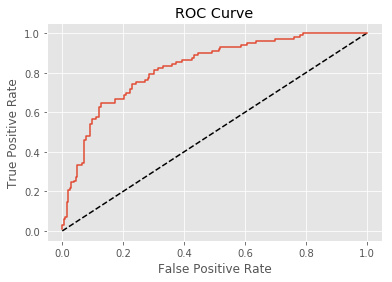

In [74]:
# Plot ROC curve
plt.style.use('ggplot')
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Area under the ROC curve (AUC)
- Larger area under the ROC curve = better model
- The area under the diagonal line is always be 0.5
- If the AUC is greater than 0.5, the model is better than random guessing

In [83]:
from sklearn.metrics import roc_auc_score

print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8268608414239483


## AUC using cross-validation

In [84]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print('AUC computed using 5-fold cross validation:\n{}'.format(cv_auc))

AUC computed using 5-fold cross validation:
[0.7987037  0.80796296 0.81944444 0.86603774 0.85037736]
